# Logistic Regression // Stochastic Gradient Descent

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
#plt.style.use(r'C:\Users\Will\.matplotlib\stylelib\test.mplstyle')
%matplotlib inline

In [3]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

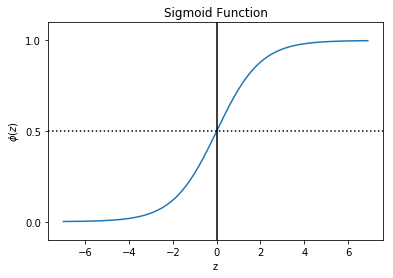

In [4]:
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z,phi_z)
plt.axvline(0.0,color='k')
#plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.yticks([0.0,0.5,1.0])
plt.ylim(-0.1,1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.title('Sigmoid Function')

This sigmoid function takes real number values as input and transforms them to values in the range [0,1], with an intercept at $\phi (z)$ = 0.5

Notice that the intercept at $\phi (z)$ = 0.5 occurs at z = 0

$\phi (0)$ = 0.5

In [7]:
class LogisticRegression(object):
    
    def __init__(self, eta=0.01, n_epochs=10, _shuffle=True, printing=False):
        
        """Initializes Logistic Regression"""
        self.eta = eta  #Initialize learning rate
        self.n_epochs = n_epochs #Initialize number of epochs
        self.shuffle = _shuffle #Initialize shuffle
        self.printing = printing #Initialize printing options
        
    def fit(self, X, y):
    
        """Fit training data.
        
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          :Training vectors, where n_samples is the number of samples and n_features is the number of features.
        
        y : array-like, shape = [n_samples]
          :Target values
        
        Returns
        -------
        self : object
        """
        
        self.w_ = np.zeros(1 + X.shape[1])  #initialize the weights ('w_') to zero
        self.cost_ = []  #for storing cost of each epoch
        self.score_ = [] #for storing score of each epoch
        
        #For each epoch...
        for i in range(1,n_epochs+1):
            
            sample_cost = [] #for storing cost of sample instance
            
            #SGD performs better when the training data is shuffled
            if self._shuffle:
                X, y = self._shuffle(X, y)            
            
            #For each sample instance xi...    Stochastic Gradient Descent runs model/updates weights for every sample instance xi
            for xi, yi in zip(X,y):
                
                #Compute output and error for xi
                output = self.net_input(xi) #Output is net input of xi and w_
                errors = (yi - output) #Error is the difference between actual class yi and predicted class of xi (w.T * x)  #NOTE ORDER?

                #Compute cost of sample xi
                cost = self.log_likelihood(output,yi)  #Objective cost function J(x):  
                sample_cost.append(cost)#append sample cost to sample_cost
                
                #Update weights with Gradient Descent
                gradient = self.gradient(xi,errors) #Calculate gradient vector; vector of partial derivative of J(w) with respect to each weight
                self.w_[1:] += self.eta * gradient #Update feature weights
                self.w_[0] += self.eta * errors.sum() #Update model bias

            #Calculate average cost of epoch
            avg_cost = sum(sample_cost)/len(sample_cost)
            self.cost_.append(avg_cost)
            
            #Score model after epoch
            score = self.score(X, y)
            self.score_.append(score) #record epoch score

            #If printing=True, print results for each epoch
            if self.printing:
                print ('Epoch', i, score, self.w_, cost)

        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0] #Dot product of the training set and fitted weights, plus fitted weight-zero
    
    def sigmoid(self,z):
        """Transforms z to real number between 0 and 1"""
        return 1.0 / (1.0 + np.exp(-self.net_input(z)))
                      
    def log_likelihood(self, X,y):
        """Compute log likelihood"""
        ll = -1 * np.sum( y * np.log(self.sigmoid(X)) + (1 - y) * np.log(1 - self.sigmoid(X)))
        return ll
        
    def gradient(self, X, errors):
        """Compute the gradient vector; vector of partial derivative of J(w) with respect to each weight"""
        return X.T.dot(errors)
    
    def activation(self, X):
        """Compute sigmoid activation"""
        return self.sigmoid(X)
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.5, 1, -1)
        
    def score(self, X, y):
        """Score the model --> Actual vs Predicted Classes"""
        predicts = self.predict(X)
        results = np.equal(predicts,y)
        correct = np.sum(results)
        score = float(correct) / float(len(results))
        return score
    
    def _shuffle(self,X,y):
        "Shuffles the data"
        r = np.random.permutation(len(y))
        return X[r], y[r]

# Load and Preview the Data

In [8]:
#Import Iris dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

#Reduce dataset to two classes: Iris-setosa and Iris-versicolor
data = df[(df[4] == 'Iris-setosa') |(df[4] == 'Iris-versicolor')]

#Reduce dataset to two features and one target: sepal/petal length measurements and species
data = data[[0,2,4]]

#Define feature set
X = data[[0,2]].values

#Define target set
y = data[4].values

#Replace species name with numerical variable
y = np.where(y == 'Iris-setosa',-1,1)

# Run Model

In [9]:
n_epochs = 8

LR = LogisticRegression(n_epochs=n_epochs, eta=0.001, printing=True).fit(X,y)

Epoch 1 0.52 [-0.01154337 -0.01980153  0.09801381] 1.38972033717
Epoch 2 0.74 [-0.02379138 -0.04767158  0.17997591] 1.38551583222
Epoch 3 0.99 [-0.03759955 -0.08823542  0.24473251] 1.26380754334
Epoch 4 1.0 [-0.04984479 -0.12465637  0.30166146] 1.40429900462
Epoch 5 1.0 [-0.06242479 -0.16581158  0.34831144] 1.41502765648
Epoch 6 1.0 [-0.07027361 -0.18294883  0.40099319] 1.06860420175
Epoch 7 1.0 [-0.07908207 -0.2081294   0.44302046] 1.43286475256
Epoch 8 1.0 [-0.08700602 -0.2308108   0.4799043 ] 0.965160309803


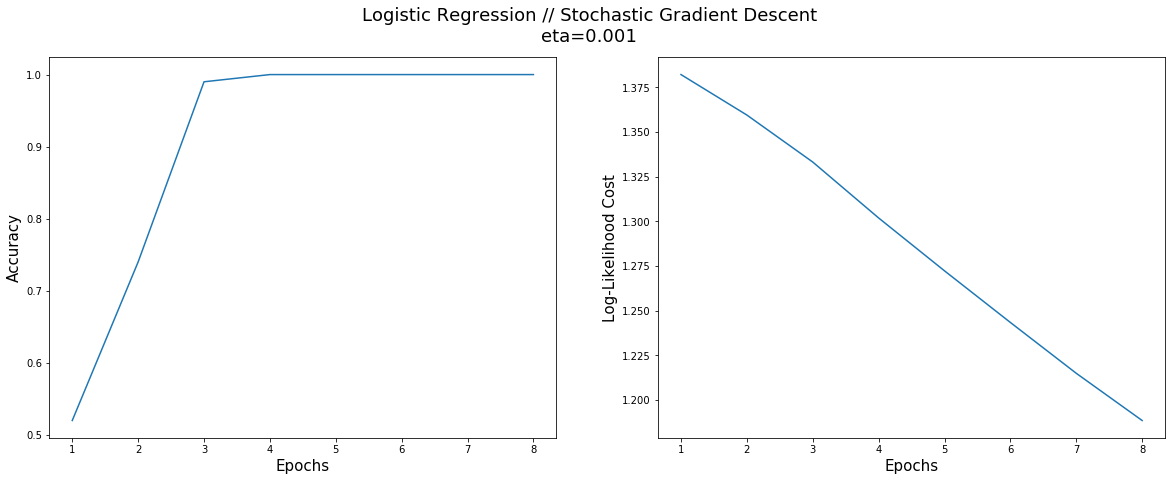

In [10]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,7))
fig.suptitle('Logistic Regression // Stochastic Gradient Descent\neta=0.001', fontsize=18)

ax1.plot(range(1, len(LR.score_) + 1), LR.score_)
ax1.set_xlabel('Epochs', fontsize=15)
ax1.set_ylabel('Accuracy', fontsize=15)

ax2.plot(range(1, len(LR.cost_) + 1), LR.cost_)
ax2.set_xlabel('Epochs', fontsize=15)
ax2.set_ylabel('Log-Likelihood Cost', fontsize=15)